# Homework Set Week 9
## insert your name here

In this homework assignment please fill the indicated cells with your code and explainations, ***run*** everything (select `cell` in the menu, and click `Run all`), save the notebook with your name appended to the filename (for example, `Homework-09-shuhaocao.ipynb`), and upload it to canvas.

This homework assignment studies and tests about the PCA/SVD and $k$-means algorithm, we will use the MNIST dataset which can be download as `npz` files either from Canvas files tab or [from Kaggle](https://www.kaggle.com/oddrationale/mnist-in-csv). This homework will prepare you for the final project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image, display

# Problem 1: SVD on MNIST

In this problem we will use the MNIST dataset. Please do the following.
* Load the data using the `mnist_train.npz` and `mnist_test.npz` files on Canvas.
* Use the first 10000 samples in the `mnist_train.npz` as training samples `X` and `y`, and the first 3000 samples in the `mnist_test.npz` as testing samples `X_test` and `y_test`.
* Use PCA from `scikit-learn`'s `decomposition` submodule to transform the training data so that the transformed data `X_reduced` retains the 95% of the variance of the original training data. Then use the PCA for `X` to transform the `X_test` into an array `X_test_reduced` that has the same second dimension with `X_reduced`.
* Use `LogisticRegression` from `scikit-learn`'s `linear_model` module to fit the `X_reduced` and `y` with `multi_class` option set to be `multinomial` (you have to change the default solver according to the [reference](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)). Then score the fitting using `X_test_reduced` and `y_test`. 
* Compare the score above with the fitting score using the unreduced data `X` and `y`, and  the score of using the reduced training data `X_reduced` and `y`. What is your observation and can you improve the testing result?

In [ ]:
# code

# Problem 2: k-means clustering on the small puzzle

In Homework 7, we have seen a small puzzle to label a newcoming datum to one of the two classes, when we know the function values $f(X) = 0$ or $1$ of each class.

This time, we will ignore the labeling, and apply $k$-means algorithm for the following 7 images in the cell below. Please do the following.
* Read the [reference of `KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) in the `sklearn.cluster` submodule.
* Apply `KMeans` on this dataset of 7 samples without labels to form **2** clusters. 
* Compare the clustering result with the labeling of the data in Homework 7, what have you observed?

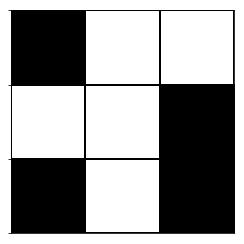

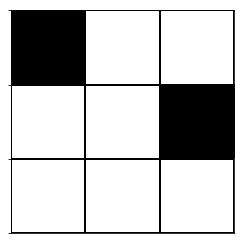

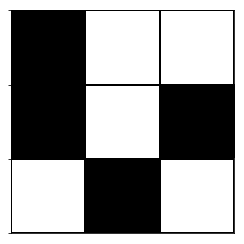

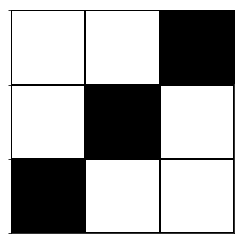

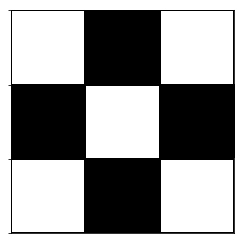

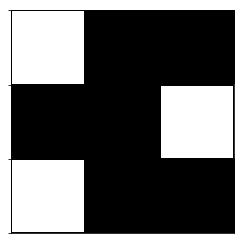

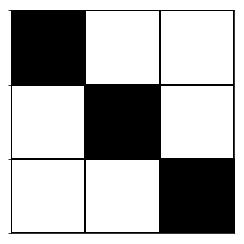

In [2]:
display(Image('mat1.png'), Image('mat2.png'), Image('mat3.png'), 
        Image('mat4.png'), Image('mat5.png'), Image('mat6.png'),
        Image('mat7.png'))

In [ ]:
# problem 2

# Problem 3: Clustering with connectivity constraints

In this problem we will try using `AgglomerativeClustering` on the famous SwissRoll dataset, the `AgglomerativeClustering` is one of the [hierarchical clustering algorithm](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) making use the tree structure of the data implied by the clustering. Based on the current clustering (tree structure), the algorithm will continue to merge/split samples using certain `linkage` criteriam together with a `connectivity` matrix which contains the pairwise distances. Intuitively speaking, if two data samples are not "connected", they should be put in different clusters.

* Read the [reference of `AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) in the `cluster` submodule of `scikit-learn`.
* Run the cells below to load and visualize the SwissRoll dataset clustering without any connectivity information. The sample points in the same color are in the same cluster. We can observe that the some points in the same color are not neighboring the other.
* Build the connectivity matrix using the following routine, which contains the sparse structures of the 10 nearest neighbors for each sample.
```python
from sklearn.neighbors import kneighbors_graph
connectivity_matrix = kneighbors_graph(X, n_neighbors=10, include_self=False)
```
* Use the `connectivity_matrix` as `connectivity` option in the `AgglomerativeClustering` class, name this class `cluster_connect`. Fit the SwissRoll dataset again, and run the last cell to visualize the new clusters, we should expect to observe that the samples that are not "connected" are not in the same cluster any more.

Reference: [Adding connectivity constraints in a clustering algorithm](https://scikit-learn.org/stable/modules/clustering.html#adding-connectivity-constraints)

In [3]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_swiss_roll

In [10]:
# Generate data (swiss roll dataset)
X, dummy = make_swiss_roll(n_samples = 1500, noise = 0.05,random_state=1)
X[:, 1] *= 0.5

Text(0.5, 0.92, 'Without connectivity constraints')

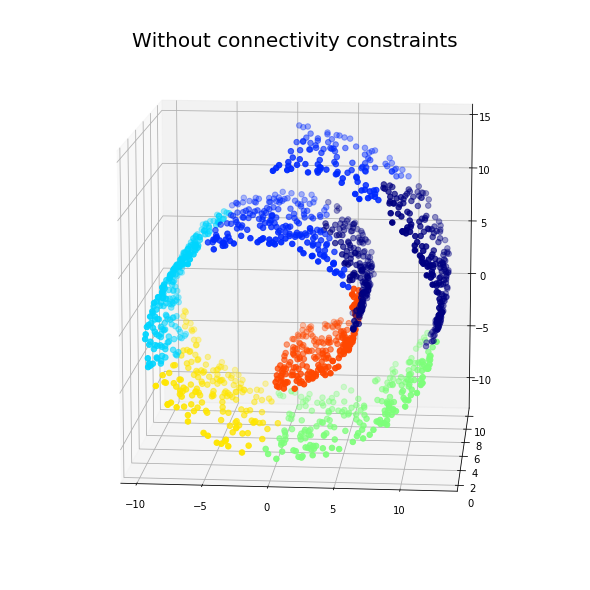

In [11]:
# clustering without connectivity constraint
cluster_no_connect = AgglomerativeClustering(n_clusters=6).fit(X)
label_nc = cluster_no_connect.labels_

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.view_init(12, -85)
for l in np.unique(label_nc):
    ax.scatter(X[label_nc == l, 0], X[label_nc == l, 1], X[label_nc == l, 2],
               color=plt.cm.jet(np.float(l) / np.max(label_nc + 1)), s=30)
plt.title("Without connectivity constraints", fontsize=20)

In [ ]:
# run this cell when you have done clustering with connectivity
# cluster_connect is the AgglomerativeClustering class with connectivity
label = cluster_connect.labels_

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.view_init(12, -85)
for l in np.unique(label):
    ax.scatter(X[label == l, 0], X[label == l, 1], X[label == l, 2],
               color=plt.cm.jet(np.float(l) / np.max(label + 1)), s=30)
plt.title("With connectivity constraints", fontsize=20)